# Stats models examples

* [Regression with Iris data set](#iris)
* [Titanic data set](#titanic)
* [Kc1 data set](#kc1)

In [16]:
%matplotlib inline

import random

import numpy as np
#import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

sns.set_context("talk")

## OLS Regression with Iris data set   <a class="anchor" id="iris"></a>¶

Let's first look at a linear regression example using the Iris dataset. 

Load the data.

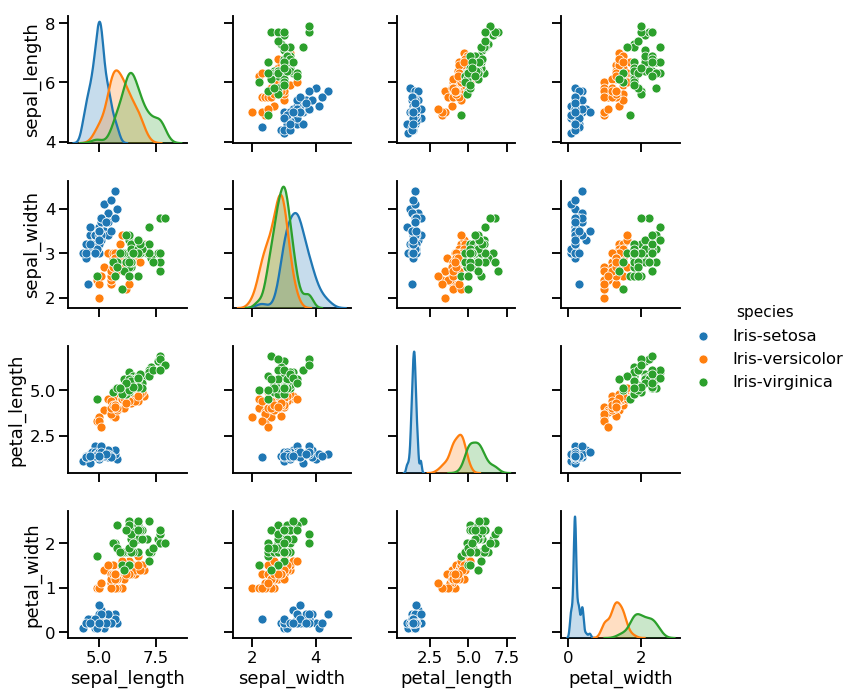

In [17]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                 header=None,
                 names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

sns.pairplot(iris, hue='species')

Check some entries.

In [18]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [19]:
iris.tail()

sepal_length  sepal_width  petal_length  petal_width         species
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

Let's predic the sepal length given the other variables.

We split the data into a training and a test set, so that we can validate the performance on held out data

In [34]:
# number of observations
n = len(iris)
is_train = np.random.rand(n) < 0.7
train = iris[is_train].reset_index(drop=True)
test = iris[~is_train].reset_index(drop=True)

We consider a simple linear model, where $sepal_length=β0+β1sepal_width+ϵ$

In [35]:
lin_model = smf.ols('sepal_length ~ sepal_width', train).fit()
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.680
Date:                Tue, 12 May 2020   Prob (F-statistic):              0.104
Time:                        22:15:05   Log-Likelihood:                -134.01
No. Observations:                 113   AIC:                             272.0
Df Residuals:                     111   BIC:                             277.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.7830      0.567     11.961      0.000       5.659       7.907
sepal_width    -0.3023      0.185     -1.637      0.104      -0.668       0.064
==============================================================================
Omnibus:                        2.688   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                2.674
Skew:                           0.364   Prob(JB):                        0.263
Kurtosis:                       2.806   Cond. No.                         25.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's compute the RMSE to see how well this model is able to predict sepal lenghts on our test set

In [37]:
def rmse(y, yhat):
    return np.sum((y - yhat)**2)**0.5

preds = lin_model.predict(test)
print('The RMSE is {}'.format(rmse(test['sepal_length'], preds)))

The RMSE is 5.506350734532238


We can add some more variables to see if we can improve our predictions.

In [38]:
lin_model = smf.ols('sepal_length ~ sepal_width + petal_width + petal_length + species', train).fit()
print(lin_model.summary())

preds = lin_model.predict(test)
print('\nThe RMSE is {}'.format(rmse(test['sepal_length'], preds)))

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     152.6
Date:                Tue, 12 May 2020   Prob (F-statistic):           5.11e-47
Time:                        22:17:16   Log-Likelihood:                -16.959
No. Observations:                 113   AIC:                             45.92
Df Residuals:                     107   BIC:                             62.28
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

We note that we are much better able to predict the sepal length using the extra information we included.

Text(0.5, 1.0, 'Evaluating our model')

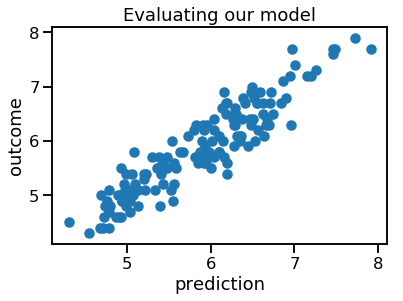

In [39]:
iris['sepal_length_hat'] = lin_model.predict(iris)

f, ax = plt.subplots()

ax.scatter(iris['sepal_length_hat'], iris['sepal_length'])
ax.set_xlabel('prediction')
ax.set_ylabel('outcome')
ax.set_title('Evaluating our model')

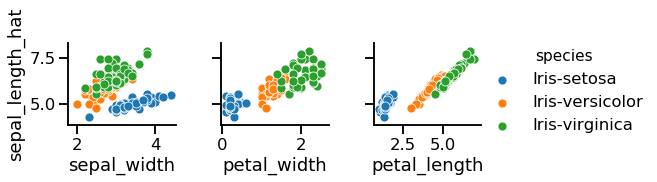

In [40]:
sns.pairplot(iris, hue='species', y_vars=['sepal_length_hat'], 
             x_vars=['sepal_width', 'petal_width', 'petal_length'])

## Logistic Regression with Titanic data set   <a class="anchor" id="titanic"></a>¶

Let's also try to predict survival on the titanic using logistic regression.

In [41]:
tidanic = pd.read_csv('data/titanic.csv').drop(['PassengerId', 'Ticket', 'Cabin', 'Age'], 1)
titanic.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex  SibSp  Parch     Fare Embarked  
0    male      1      0   7.2500        S  
1  female      1      0  71.2833        C  
2  female      0      0   7.9250        S  
3  female      1      0  53.1000        S  
4    male      0      0   8.0500        S

There are some missing values.

In [42]:
titanic.isnull().sum(0)

Survived    0
Pclass      0
Name        0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

Remove the missing values.

In [43]:
titanic = titanic.dropna()
titanic.isnull().sum(0)

Survived    0
Pclass      0
Name        0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [44]:
log_model = smf.logit('Survived ~ C(Pclass) + Sex + C(Pclass):Sex', titanic).fit()
log_model.summary()

Optimization terminated successfully.
         Current function value: 0.448800
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            5
Date:                Tue, 12 May 2020   Pseudo R-squ.:                  0.3254
Time:                        22:20:56   Log-Likelihood:                -398.98
converged:                       True   LL-Null:                       -591.41
                                        LLR p-value:                 5.452e-81
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      3.3900      0.587      5.775      0.000       2.240       4.541
C(Pclass)[T.2]                -0.9333      0.725     -1.287      0.198      -2.354       0.488
C(Pclass)[T.3]                -3.3900      0.610     -5.556      0.000      -4.586      -2.194
Sex[T.male]                   -3.9272      0.616     -6.373      0.000      -5.135      -2.719
C(Pclass)[T.2]:Sex[T.male]    -0.2072      0.794     -0.261      0.794      -1.764       1.349
C(Pclass)[T.3]:Sex[T.male]     2.0735      0.657      3.154      0.002       0.785       3.362
==============================================================================================
"""

In [45]:
titanic['Survived_hat'] = log_model.predict(titanic)

In [46]:
titanic.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex  SibSp  Parch     Fare Embarked  Survived_hat  
0    male      1      0   7.2500        S      0.135447  
1  female      1      0  71.2833        C      0.967391  
2  female      0      0   7.9250        S      0.500000  
3  female      1      0  53.1000        S      0.967391  
4    male      0      0   8.0500        S      0.135447

## Regression with Kc1 data set    <a class="anchor" id="kc1"></a>¶

In [32]:
kc1 = pd.read_csv('./data/kc1_csv.csv')

In [31]:
kc1.head()

loc  v(g)  ev(g)  iv(g)      n       v     l      d      i         e  \
0   1.1   1.4    1.4    1.4    1.3    1.30  1.30   1.30   1.30      1.30   
1   1.0   1.0    1.0    1.0    1.0    1.00  1.00   1.00   1.00      1.00   
2  83.0  11.0    1.0   11.0  171.0  927.89  0.04  23.04  40.27  21378.61   
3  46.0   8.0    6.0    8.0  141.0  769.78  0.07  14.86  51.81  11436.73   
4  25.0   3.0    1.0    3.0   58.0  254.75  0.11   9.35  27.25   2381.95   

    ...     lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  \
0   ...          2          2        2                  2      1.2        1.2   
1   ...          1          1        1                  1      1.0        1.0   
2   ...         65         10        6                  0     18.0       25.0   
3   ...         37          2        5                  0     16.0       28.0   
4   ...         21          0        2                  0     11.0       10.0   

   total_Op  total_Opnd  branchCount  defects  
0       1.2         1.2          1.4    False  
1       1.0         1.0          1.0     True  
2     107.0        64.0         21.0     True  
3      89.0        52.0         15.0     True  
4      41.0        17.0          5.0     True  

[5 rows x 22 columns]

In [47]:
kc1.tail()

loc  v(g)  ev(g)  iv(g)     n       v     l     d      i        e  \
2104  19.0   2.0    1.0    2.0  40.0  175.69  0.15  6.82  25.77  1197.90   
2105  23.0   3.0    3.0    3.0  60.0  278.63  0.10  9.69  28.75  2700.58   
2106   2.0   1.0    1.0    1.0   4.0    8.00  0.67  1.50   5.33    12.00   
2107  13.0   1.0    1.0    1.0  17.0   60.94  0.25  4.00  15.24   243.78   
2108  11.0   2.0    1.0    2.0  27.0  102.80  0.17  6.00  17.13   616.79   

       ...     lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  \
2104   ...         12          1        2                  0     10.0   
2105   ...         18          1        2                  0     12.0   
2106   ...          0          0        0                  0      3.0   
2107   ...          6          0        5                  0      6.0   
2108   ...          9          0        0                  0      8.0   

      uniq_Opnd  total_Op  total_Opnd  branchCount  defects  
2104       11.0      25.0        15.0          3.0    False  
2105       13.0      39.0        21.0          5.0    False  
2106        1.0       3.0         1.0          1.0    False  
2107        6.0       9.0         8.0          1.0    False  
2108        6.0      18.0         9.0          3.0    False  

[5 rows x 22 columns]

In [33]:
kc1.shape

(2109, 22)

In [48]:
kc1.isnull().sum(0)

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [94]:
from patsy import dmatrices

y, X = dmatrices('lOCode ~ loc + lOComment + lOBlank + defects', data=kc1, 
                 return_type='dataframe')
mod1 = sm.OLS(y,X)

In [95]:
res = mod1.fit()

In [96]:
res.params

Intercept         -2.551477
defects[T.True]    0.138763
loc                0.941768
lOComment         -0.859671
lOBlank           -0.748660
dtype: float64

In [97]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lOCode   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 3.063e+04
Date:                Tue, 12 May 2020   Prob (F-statistic):               0.00
Time:                        22:59:05   Log-Likelihood:                -5407.1
No. Observations:                2109   AIC:                         1.082e+04
Df Residuals:                    2104   BIC:                         1.085e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.5515      0.086    -29.504      0.000      -2.721      -2.382
defects[T.True]     0.1388      0.203      0.685      0.494      -0.259       0.536
loc                 0.9418      0.005    208.149      0.000       0.933       0.951
lOComment          -0.8597      0.031    -28.010      0.000      -0.920      -0.799
lOBlank            -0.7487      0.032    -23.687      0.000      -0.811      -0.687
==============================================================================
Omnibus:                     2615.619   Durbin-Watson:                   1.349
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           365502.191
Skew:                          -6.616   Prob(JB):                         0.00
Kurtosis:                      66.121   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""